<a href="https://colab.research.google.com/github/paiml/python_for_datascience/blob/master/Lesson2_Python_For_Data_Science_Introduction_to_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 2 Introduction to Colab

## 2.1 First Colab Document

### What is Colab?



*   Hosted Jupyter Notebooks
*   GPU/TPU enabled runtimes
*   Google Docs Integration



### Creating Colab Notebooks





Three main interfaces:



*   New Notebook (Python2 or Python3)
*   Upload Notebooks
*   Open Notebooks (Github, Drive, Upload)



### Key Features





In [5]:
import pandas as pd
df = pd.read_csv("mlb_weight_ht.csv")
df.head()

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71



*   Iron Icon
*  Table of Contents
*  Code snippits
*  Files





### Forms in Colab

In [0]:
Use_Python = False #@param ["False", "True"] {type:"raw"}

In [10]:
print(f"You select it is {Use_Python} you use Python")

You select it is False you use Python


### Upload to Colab

In [11]:
from google.colab import files
uploaded = files.upload()

Saving mlb_weight_ht.csv to mlb_weight_ht (1).csv


### Python executable

Can run scripts, REPL and even run python statements with -c flag and semicolon to string together multiple statements

In [12]:
!python -c "import os;print(os.listdir())"

['.config', 'mlb_weight_ht.csv', 'mlb_weight_ht (1).csv', 'sample_data']


In [13]:
!ls -l

total 100
-rw-r--r-- 1 root root 46535 Feb 11 18:11 'mlb_weight_ht (1).csv'
-rw-r--r-- 1 root root 46535 Feb 11 18:09  mlb_weight_ht.csv
drwxr-xr-x 1 root root  4096 Feb  6 17:31  sample_data


In [0]:
!pip install yellowbrick

In [14]:
#this is how you capture input to a program
import sys;sys.argv

['/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py',
 '-f',
 '/root/.local/share/jupyter/runtime/kernel-990d7124-1599-4f5e-b6d9-1e66b9359d20.json']

### GitHub Integration





*   **Load Public Notebooks from Github**

*Original URL*:  https://github.com/paiml/python_for_datascience/blob/master/Lesson2_Python_For_Data_Science_Introduction_to_Colab.ipynb

*Colab Load UR*L: 
https://colab.research.google.com/github.com/paiml/python_for_datascience/blob/master/Lesson2_Python_For_Data_Science_Introduction_to_Colab.ipynb


*   **Browsing Github Repos**

*All of Github*:

http://colab.research.google.com/github

*An organization or user*

http://colab.research.google.com/github/paiml/

* Open in Colab Badge

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/paiml/python_for_datascience/blob/master/Lesson2_Python_For_Data_Science_Introduction_to_Colab.ipynb)

* **Saving to Github**

 - Github repo
 - Gist



## 2.2 Managing Colab Documents

### Kaggle Load Recipe

#### Mount GDrive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

#### list in python

In [0]:
import os;os.listdir("/content/gdrive/My Drive/awsml")

['kaggle.json']

#### list in bash

In [0]:
!ls -l /content/gdrive/My\ Drive/awsml

total 1
-rw------- 1 root root 64 Nov 21 22:24 kaggle.json


#### Wire up Kaggle

In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
!cp /content/gdrive/My\ Drive/awsml/kaggle.json ~/.kaggle/kaggle.json

#### Get Kaggle MNIST Data

In [0]:
!kaggle datasets download -d oddrationale/mnist-in-csv
!ls -l /content
!unzip /content/mnist-in-csv.zip


mnist-in-csv.zip: Skipping, found more recently modified local copy (use --force to force download)
total 140560
drwxr-xr-x 2 root root      4096 Nov 21 22:59 data
drwx------ 4 root root      4096 Nov 21 22:37 gdrive
-rw-r--r-- 1 root root  15970516 Nov 21 22:54 mnist-in-csv.zip
-rw-r--r-- 1 root root  18303650 May 19  2018 mnist_test.csv
-rw-r--r-- 1 root root 109640201 May 19  2018 mnist_train.csv
drwxr-xr-x 2 root root      4096 Nov 20 18:17 sample_data
Archive:  /content/mnist-in-csv.zip
replace mnist_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: mnist_train.csv         
  inflating: mnist_test.csv          


#### Load into Pandas

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#train
train_path = "/content/mnist_train.csv"
data_train = pd.read_csv(train_path)
y_train = np.array(data_train.iloc[:, 0])
x_train = np.array(data_train.iloc[:, 1:])

#test
test_path = "/content/mnist_test.csv"
data_test = pd.read_csv(test_path)
x_test = np.array(data_test)

#features
n_features_train = x_train.shape[1]
n_samples_train = x_train.shape[0]
n_features_test = x_test.shape[1]
n_samples_test = x_test.shape[0]
print(n_features_train, n_samples_train, n_features_test, n_samples_test)
print(x_train.shape, y_train.shape, x_test.shape)

784 60000 785 10000
(60000, 784) (60000,) (10000, 785)


#### Show Image

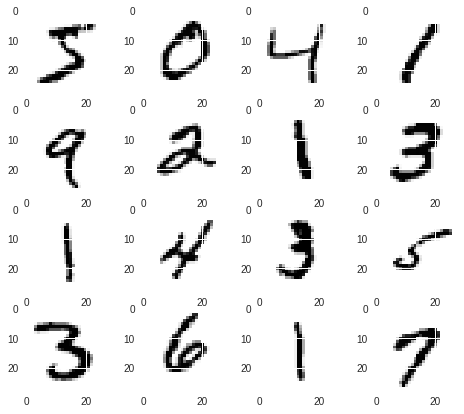

In [0]:
def show_img(x):
    size_img = 28
    plt.figure(figsize=(8,7))
    num_images = 16
    n_samples = x.shape[0]
    x = x.reshape(n_samples, size_img, size_img)
    for i in range(num_images):
        plt.subplot(4, 4, i+1)
        plt.imshow(x[i])
    plt.show()
    
show_img(x_train)


### Mount GDrive Workflow


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

In [0]:
import os;os.listdir("/content/gdrive/My Drive/awsml")

['kaggle.json', 'credentials', 'config']

#### Load AWS API Keys (Colab Notebook)

Put keys in local or remote GDrive:  

`cp ~/.aws/credentials /Users/myname/Google\ Drive/awsml/`

#### Install Boto

In [0]:
!pip -q install boto3


#### Create API Config

In [0]:
!mkdir -p ~/.aws &&\
  cp /content/gdrive/My\ Drive/awsml/credentials ~/.aws/credentials 

#### Test Comprehend API Call

In [0]:
import boto3
comprehend = boto3.client(service_name='comprehend', region_name="us-east-1")
text = "There is smoke in San Francisco and it makes me angry"
comprehend.detect_sentiment(Text=text, LanguageCode='en')

{'ResponseMetadata': {'HTTPHeaders': {'connection': 'keep-alive',
   'content-length': '164',
   'content-type': 'application/x-amz-json-1.1',
   'date': 'Tue, 04 Dec 2018 19:10:58 GMT',
   'x-amzn-requestid': '54e64fc0-f7f8-11e8-8c3f-f109987ed7df'},
  'HTTPStatusCode': 200,
  'RequestId': '54e64fc0-f7f8-11e8-8c3f-f109987ed7df',
  'RetryAttempts': 0},
 u'Sentiment': u'NEGATIVE',
 u'SentimentScore': {u'Mixed': 0.010819978080689907,
  u'Negative': 0.9212133288383484,
  u'Neutral': 0.06721948087215424,
  u'Positive': 0.0007472822326235473}}

### Changing Runtime(s)



*   GPU
*   TPU
*   Python 2
*   Python 3
*   Local runtime



### Universal Images and Data

* Images (Can be stored using the Github Issue Hack)

![Stored in github issue](https://user-images.githubusercontent.com/58792/52564586-6d738e00-2db9-11e9-92ff-f3252eac532b.png)

* Files and Data can be stored used large file hack

 - [large file](https://github.com/noahgift/food/blob/master/data/en.openfoodfacts.org.products.tsv)
 - workflow:  https://git-lfs.github.com/
 
 

```
git lfs install
git lfs track "*.csv"
git add .gitattributes
git add file.psd
git commit -m "Add design file"
git push origin maste
```





### Colab to Colab Cell Copy Hack

![cell copy](https://user-images.githubusercontent.com/58792/52566608-0c4eb900-2dbf-11e9-93b9-86248ba2eee6.png)

## 2.3 Using magic functions

### %timeit

In [0]:
too_many_decimals = 1.912345897

print("built in Python Round")
%timeit round(too_many_decimals, 2)

print("numpy round")
%timeit np.round(too_many_decimals, 2)

print("Pandas DataFrame round")
%timeit df.round(2)

### %alias

In [0]:
alias lscsv ls -l sample_data/*.csv 

In [0]:
lscsv

-rw-r--r-- 1 root root   301141 Feb  6 17:31 sample_data/california_housing_test.csv
-rw-r--r-- 1 root root  1706430 Feb  6 17:31 sample_data/california_housing_train.csv
-rw-r--r-- 1 root root 18289443 Feb  6 17:31 sample_data/mnist_test.csv
-rw-r--r-- 1 root root 36523880 Feb  6 17:31 sample_data/mnist_train_small.csv


[Reference These]
https://ipython.readthedocs.io/en/stable/interactive/magics.html

### %who

Print variables

In [0]:
who

alt	 data	 os	 stocks	 


In [0]:
stocks.head()

,symbol,date,price
0,MSFT,2000-01-01,39.81
1,MSFT,2000-02-01,36.35
2,MSFT,2000-03-01,43.22
3,MSFT,2000-04-01,28.37
4,MSFT,2000-05-01,25.45


### %writefile

In [0]:
%%writefile magic_stuff.txt
import pandas as pd
df = pd.read_csv(
    "https://raw.githubusercontent.com/noahgift/food/master/data/features.en.openfoodfacts.org.products.csv")
df.drop(["Unnamed: 0", "exceeded", "g_sum", "energy_100g"], axis=1, inplace=True) #drop two rows we don't need
df = df.drop(df.index[[1,11877]]) #drop outlier
df.rename(index=str, columns={"reconstructed_energy": "energy_100g"}, inplace=True)
df.head()

Writing magic_stuff.txt


In [0]:
cat magic_stuff.txt

import pandas as pd
df = pd.read_csv(
    "https://raw.githubusercontent.com/noahgift/food/master/data/features.en.openfoodfacts.org.products.csv")
df.drop(["Unnamed: 0", "exceeded", "g_sum", "energy_100g"], axis=1, inplace=True) #drop two rows we don't need
df = df.drop(df.index[[1,11877]]) #drop outlier
df.rename(index=str, columns={"reconstructed_energy": "energy_100g"}, inplace=True)
df.head()

### Bash

In [0]:
%%bash
uname -a

Linux f88d2e69704c 4.14.79+ #1 SMP Wed Dec 19 21:19:13 PST 2018 x86_64 x86_64 x86_64 GNU/Linux


### Python2

In [0]:
%%python2
print "old school"


old school


### HTML

In [0]:
%%html
<h1>Only The Best Tags</h>

## 2.4 Compatibility with Jupyter

### Jupyter Import/Export



*   Upload Jupyter Notebooks
*   Download Jupyter Notebooks



### Using Plotly

#### Install Latest Plotly

In [0]:
import plotly
plotly.__version__

'3.6.0'

In [0]:
!pip uninstall -q -y plotly
!pip install plotly==3.6.0

    100% |████████████████████████████████| 31.1MB 999kB/s 
  Stored in directory: /root/.cache/pip/wheels/67/0b/29/08c7f5caed2d1ac446db982ff607b326d49bfa0bd3a67ef8c7
  Stored in directory: /root/.cache/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built plotly retrying


In [0]:
import plotly
plotly.__version__

'3.6.0'

In [0]:
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
  '''))
  init_notebook_mode(connected=False)

#### Plot

In [0]:
import pandas as pd
df = pd.read_csv(
    "https://raw.githubusercontent.com/noahgift/food/master/data/features.en.openfoodfacts.org.products.csv")
df.drop(["Unnamed: 0", "exceeded", "g_sum", "energy_100g"], axis=1, inplace=True) #drop two rows we don't need
df = df.drop(df.index[[1,11877]]) #drop outlier
df.rename(index=str, columns={"reconstructed_energy": "energy_100g"}, inplace=True)
df.head()

,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,energy_100g,product
0,28.57,64.29,14.29,3.57,0.00000,2267.85,Banana Chips Sweetened (Whole)
2,57.14,17.86,3.57,17.86,1.22428,2835.70,Organic Salted Nut Mix
3,18.75,57.81,15.62,14.06,0.13970,1953.04,Organic Muesli
4,36.67,36.67,3.33,16.67,1.60782,2336.91,Zen Party Mix
5,18.18,60.00,21.82,14.55,0.02286,1976.37,Cinnamon Nut Granola


In [0]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

df_cluster_features = df.drop("product", axis=1)
scaler = MinMaxScaler()
scaler.fit(df_cluster_features)
k_means = KMeans(n_clusters=3)
kmeans = k_means.fit(scaler.transform(df_cluster_features))
df['cluster'] = kmeans.labels_
df.head()

,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,energy_100g,product,cluster
0,28.57,64.29,14.29,3.57,0.00000,2267.85,Banana Chips Sweetened (Whole),2
2,57.14,17.86,3.57,17.86,1.22428,2835.70,Organic Salted Nut Mix,2
3,18.75,57.81,15.62,14.06,0.13970,1953.04,Organic Muesli,2
4,36.67,36.67,3.33,16.67,1.60782,2336.91,Zen Party Mix,2
5,18.18,60.00,21.82,14.55,0.02286,1976.37,Cinnamon Nut Granola,2


In [0]:
import plotly.offline as py
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode
enable_plotly_in_cell()


trace1 = go.Scatter3d(
    x=df["fat_100g"],
    y=df["carbohydrates_100g"],
    z=df["proteins_100g"],
    mode='markers',
    text=df["product"],
    marker=dict(
        size=12,
        color=df["cluster"],                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)
#print(trace1)
data = [trace1]
layout = go.Layout(
    showlegend=False,
    title="Protein-Fat-Carb:  Food Energy Types",
    scene = dict(
        xaxis = dict(title='X: Fat Content-100g'),
        yaxis = dict(title="Y:  Carbohydrate Content-100g"),
        zaxis = dict(title="Z:  Protein Content-100g"),
    ),
    width=1000,
    height=900,
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

### Installing Software

In [0]:
!pip install -q requests